TRANSLATION MODELLING: Estimate the parameters of the translation model P(f|e).

Write code that implements the estimation algorithm for IBM model 1. Then print, for either Swedish, German, or French, the 10 words that the English word european is most likely to be translated into, according to your estimate. It can be interesting to look at this list of 10 words and see how it changes during the EM iterations.

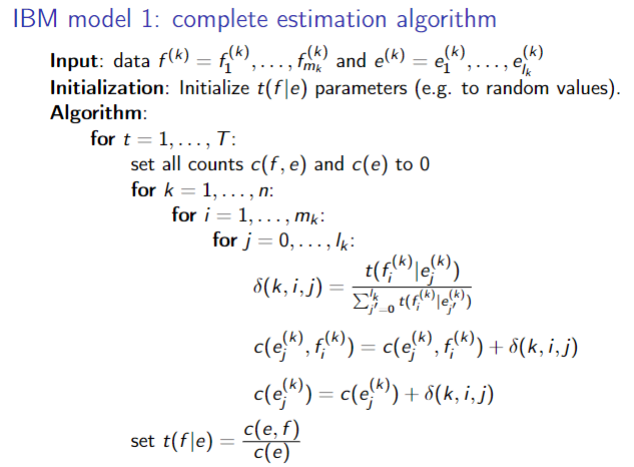
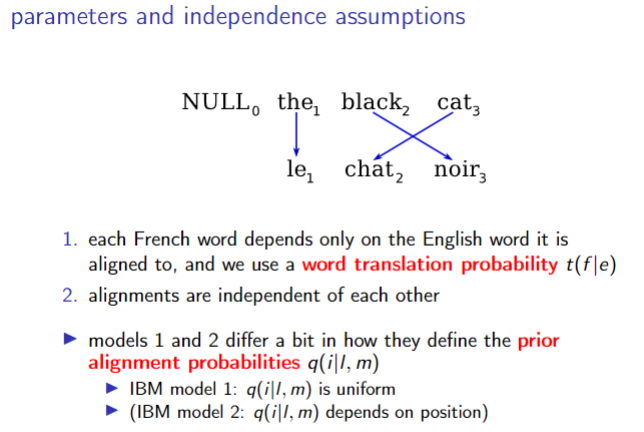

In [1]:
import numpy as np
from collections import defaultdict
import pandas as pd

In [2]:
def initialize_parameters(target_vocab):
    # Initialize translation probabilities uniformly
    translation_probs = defaultdict(lambda: defaultdict(lambda: 1.0 / len(target_vocab)))
    return translation_probs

# calculate the expected counts for each pair of source and target words
def em_algorithm(source_sentences, target_sentences, translation_probs, num_iterations=2):
    for _ in range(num_iterations):
        # Expectation step
        counts = defaultdict(lambda: defaultdict(float))
        total_target_counts = defaultdict(float)

        for source_sentence, target_sentence in zip(source_sentences, target_sentences):
            for source_word in source_sentence:
                total_prob = sum(translation_probs[source_word][target_word] for target_word in target_sentence)
                for target_word in target_sentence:
                    normalized_prob = translation_probs[source_word][target_word] / total_prob
                    counts[source_word][target_word] += normalized_prob
                    total_target_counts[target_word] += normalized_prob

        # Maximization step
        # update translation probabilities based on the expected counts calculated in the expectation step
        for source_word in translation_probs:
            for target_word in translation_probs[source_word]:
                translation_probs[source_word][target_word] = counts[source_word][target_word] / total_target_counts[target_word]

    return translation_probs

def top_translations(translation_probs, english_word, num_translations=10):
    sorted_translations = sorted(translation_probs.items(), key=lambda x: x[1][english_word], reverse=True)
    return sorted_translations[:num_translations]


def tokenize(paragraph):
    # Replace other punctuation marks with spaces
    for char in ",?!.":
        paragraph = paragraph.replace(char, ' ')
    # Split the paragraph into sentences using new lines
    sentences = paragraph.split('\n')
    # Tokenize each sentence
    tokenized_sentences = [sentence.split() for sentence in sentences if sentence]
    return tokenized_sentences


In [3]:
source_data_path = 'data/europarl-v7.sv-en.lc.sv'
target_data_path = 'data/europarl-v7.sv-en.lc.en'

with open(source_data_path, 'r', encoding='utf-8') as file:
    source_data = file.read()

with open(target_data_path, 'r', encoding='utf-8') as file:
    target_data = file.read()

# Sample parallel sentences
source_sentences = tokenize(source_data)
target_sentences =  tokenize(target_data)

In [4]:
# Vocabulary
source_vocab = set([word for sentence in source_sentences for word in sentence])
target_vocab = set([word for sentence in target_sentences for word in sentence])

# Initialize parameters
translation_probs = initialize_parameters(target_vocab)

# Run EM algorithm
translation_probs = em_algorithm(source_sentences, target_sentences, translation_probs)

english_word = 'european'
top_translations_list = top_translations(translation_probs, english_word)

# Print the results
print(f"Top 10 translations for the English word '{english_word}':")
for target_word, prob_dict in top_translations_list:
    probability = prob_dict['probability']
    print(f"{target_word}: {probability:.4f}")

Top 10 translations for the English word 'european':
europeiska: 0.0001
att: 0.0050
i: 0.0001
och: 0.0029
en: 0.0053
för: 0.0041
det: 0.0038
unionen: 0.0001
som: 0.0001
den: 0.0001


In [5]:
def greedy_search(source_sentence, translation_probs):
    # Initialize an empty list to store the translated words
    translated_sentence = []

    # Iterate through each word in the source sentence
    for source_word in source_sentence:
        # Find the English word with the highest probability given the source word
        english_word = max(translation_probs[source_word], key=translation_probs[source_word].get)

        # Add the selected English word to the translated sentence
        translated_sentence.append(english_word)

    return translated_sentence

limit = 5
count = 0
for sentence in source_sentences:
    result = greedy_search(sentence, translation_probs)
    print("Source Sentence:", sentence)
    print("Translated Sentence:", result)
    count += 1
    if count == limit:
        break


Source Sentence: ['jag', 'förklarar', 'europaparlamentets', 'session', 'återupptagen', 'efter', 'avbrottet', 'den', '17', 'december', 'jag', 'vill', 'på', 'nytt', 'önska', 'er', 'ett', 'gott', 'nytt', 'år', 'och', 'jag', 'hoppas', 'att', 'ni', 'haft', 'en', 'trevlig', 'semester']
Translated Sentence: ['punishment', 'omitting', 'trip', 'adjourned', 'adjourned', 'after', 'adjourned', 'sympathises', '17', 'december', 'punishment', 'want', 'btf', 'redistributed', 'accumulation', 'rossa', 'paper-pushers', 'time-keeping', 'redistributed', 'year', 'and', 'punishment', 'hope', 'ensure', 'you', 'scare', 'planted', 'wife', 'festive']
Source Sentence: ['som', 'ni', 'kunnat', 'konstatera', 'ägde', '&quot;', 'den', 'stora', 'år', '2000-buggen', '&quot;', 'aldrig', 'rum', 'däremot', 'har', 'invånarna', 'i', 'ett', 'antal', 'av', 'våra', 'medlemsländer', 'drabbats', 'av', 'naturkatastrofer', 'som', 'verkligen', 'varit', 'förskräckliga']
Translated Sentence: ['trio', 'you', 'sunk', 'equitably', 'dread